In [ ]:
Optimizing the number of centroids

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
blobs, classes = make_blobs(500, centers=3)

In [2]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [3]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 1.        ,  0.13648469],
       [ 1.        ,  0.64771514],
       [ 0.        ,  0.5335237 ],
       [ 1.        ,  0.66078185],
       [ 0.        ,  0.66130148]])

In [4]:
silhouette_samples.mean()

0.61380435271966061

In [5]:
metrics.silhouette_score(blobs, kmean.labels_)

0.61380435271966061

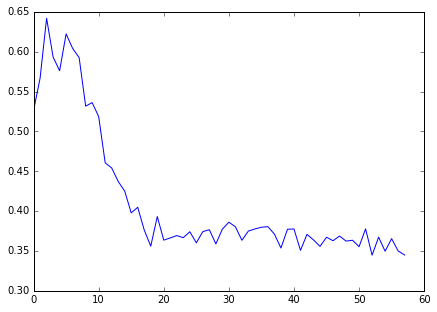

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

blobs, classes = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2, 60):
     kmean = KMeans(n_clusters=k).fit(blobs)
     silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)